In [135]:
import math

MODEL_G = 9.81
MODEL_DT = 0.001

class Body:
    def __init__(self, x, y, vx, vy):
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        
        self.trajectory_x = []
        self.trajectory_y = []
        

    def advance(self):
        self.trajectory_x.append(self.x)
        self.trajectory_y.append(self.y)
        
        self.x += self.vx * MODEL_DT
        self.y += self.vy * MODEL_DT
        self.vy -= MODEL_G * MODEL_DT
        
class Rocket(Body):
    def __init__(self, x, y):
        super().__init__(x, y, 20, 20)
        self.m = 4
        self.u = 20
        
    def advance(self):
        super().advance()
        if self.m > 1:
            dv = self.u * 0.002 / self.m
            self.vx += dv * self.vx / (self.vx + abs(self.vy))
            self.vy += dv * self.vy / (self.vx + abs(self.vy)) - MODEL_G * MODEL_DT
            self.x += self.vx * MODEL_DT
            self.y += self.vy * MODEL_DT
            self.m -= 0.002

In [152]:
import numpy as np

np.sin

b = Body(0, 0, 20, 20)
r = Rocket(0, 0)

bodies = [b, r]

for t in np.r_[0:4:MODEL_DT]:
    for b in bodies:
        b.advance()

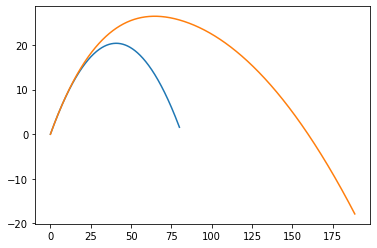

In [153]:
%matplotlib inline
from matplotlib import pyplot as pp

for b in bodies:
    pp.plot(b.trajectory_x, b.trajectory_y)